# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 1
## Deadline Monday 9th November at 12pm (Noon)

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?) How accurate is it
- Network efficiency (how does your network compare to the optimum networks for this task?) How efficent is it at learning, least complexity
- Network training (do you do a good job of traning your network?) How long does it take to train the network and how do you do it


In [4]:
#importing modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math

import tensorflow as tf
from tensorflow import keras


mpl.rcParams.update({'font.size': 10})
mpl.rcParams['figure.dpi']=200

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


## 1) Single Convolutional layer NN

In this seciton of the notebook a network with one convolutional layer has been created. The structure of which has been explored alongside other dense layers to find the most accurate and efficient structure for identifying the MNIST data set. 
10 kernels of 3x3 size are used for the convolutional layer and one dense layer with 60 neurons. Relu activation functions have been chosen as they are more efficient.

The networks in this notebook have been trained and tested for each epoch simultaneously. This is more computationally expensive however it is not relective of the performance of the network and is simply used to gain a better perspective on how quickly the network develops.


In [5]:
#importing MNIST data set
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#normalising
train_images = train_images/255
test_images = test_images/255

#fixing dimensionality
train_images, test_images = train_images[...,np.newaxis], test_images[...,np.newaxis]

#creating the network
model = keras.Sequential([
    keras.layers.Conv2D(10,3,input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10)])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 60)                101460    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                610       
Total params: 102,170
Trainable params: 102,170
Non-trainable params: 0
_________________________________________________________________


In [6]:
#compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#training the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4026 - accuracy: 0.8861 - val_loss: 0.0785 - val_accuracy: 0.9768
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0730 - accuracy: 0.9789 - val_loss: 0.0593 - val_accuracy: 0.9808
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0505 - accuracy: 0.9847 - val_loss: 0.0475 - val_accuracy: 0.9839
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0352 - accuracy: 0.9883 - val_loss: 0.0500 - val_accuracy: 0.9835
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.0489 - val_accuracy: 0.9846


313/313 - 2s - loss: 0.0510 - accuracy: 0.9825

Validation test accuracy: 0.9825000166893005


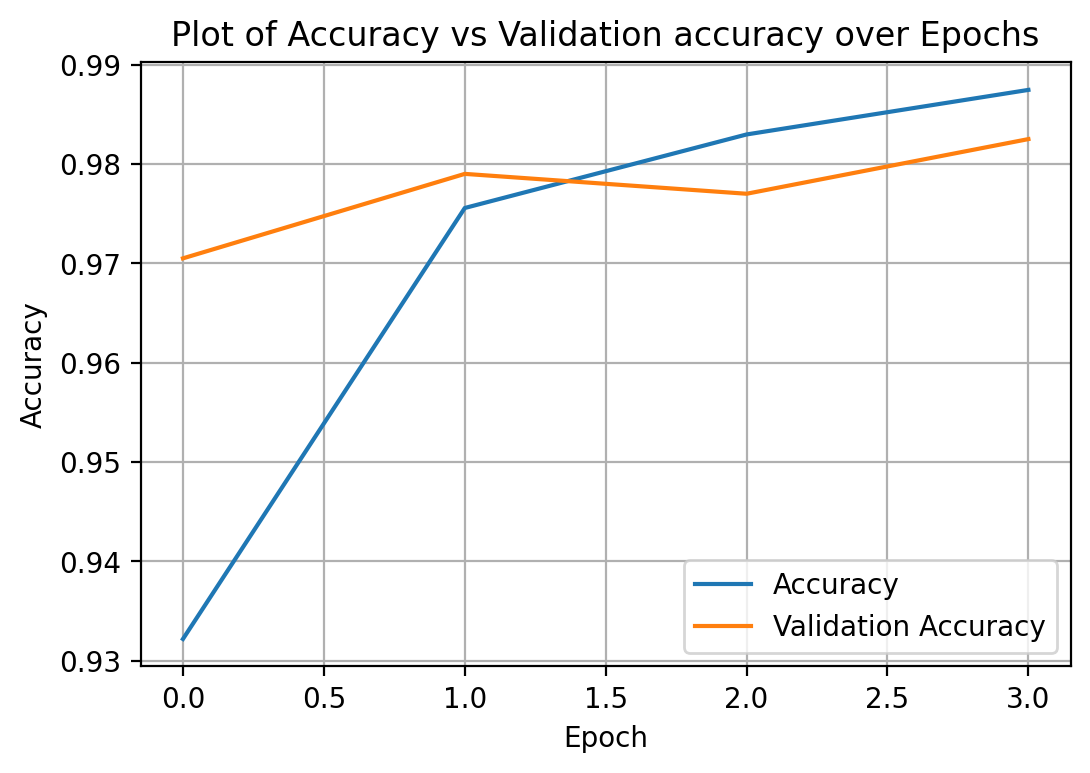

In [19]:
#plotting results
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Plot of Accuracy vs Validation accuracy over Epochs')
plt.grid()

#testing this model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nValidation test accuracy:', test_acc)

## 2) Multi-convolutional layer NN

In this second section of the notebook the structure of a network with multiple convolutional layers is explored, this is a more complex network and so has more parameters and flexibilty to allow for a higher validation accuracy.



In [4]:
#creating a new network
model2 = keras.Sequential([
    keras.layers.Conv2D(5,3,input_shape=(28,28,1),activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(3,3,activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(10)])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 3)         138       
_________________________________________________________________
flatten (Flatten)            (None, 363)               0         
_________________________________________________________________
dense (Dense)                (None, 30)                10920     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 11,418
Trainable params: 11,418
Non-trainable params: 0
____________________________________________________

In [8]:
#compiling the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#training the model
history = model2.fit(train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))

Epoch 1/4
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0612 - accuracy: 0.9812 - val_loss: 0.0579 - val_accuracy: 0.9809
Epoch 2/4
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0600 - val_accuracy: 0.9797
Epoch 3/4
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0571 - val_accuracy: 0.9825
Epoch 4/4
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0559 - val_accuracy: 0.9820


313/313 - 1s - loss: 0.0559 - accuracy: 0.9820

Validation test accuracy: 0.9819999933242798


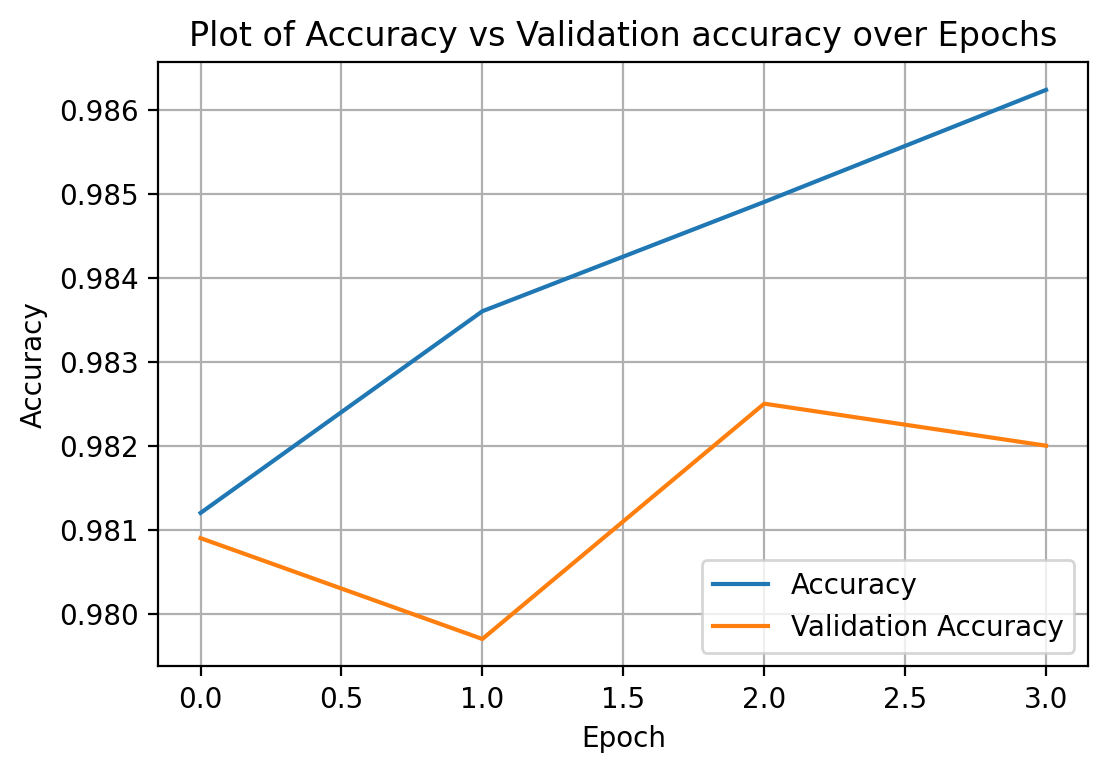

In [11]:
#plotting results
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Plot of Accuracy vs Validation accuracy over Epochs')
plt.grid()

#testing this model
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)

print('\nValidation test accuracy:', test_acc)

## Conclusion
 It seem that by comparing the model with a single convolutional layer and the model with more than one convolutional layer there is no siginficant difference in the validation accuracies of the networks. So while the network with more than one convolutional layer it more computationally expensive in terms of training time it does not garner and better performance than the model with a single convolutional layer.

To go further with this analysis a more powerful computational platform would be required to further analyse the different and more complex variations of the multi convolutional layer NN.